**ASSIGNMENT - Neural Network Type Classification | TMNIST**

**NEURAL NETWORK**

Training data is essential for neural networks to develop and enhance their accuracy over time. However, such algorithms for learning become effective tools in the fields of computing and machine learning once they are adjusted for accuracy, enabling us to quickly classify and cluster data.

**DATASET USED** - https://www.kaggle.com/datasets/nimishmagre/tmnist-glyphs-1812-characters

 **TMNIST GLYPHS**

* A database of over 500,000 MNIST-style pictures made up of 1,812 unique glyphs and 2,990 font types is called **TMNIST (Typography MNIST) Glyphs.**
* There is only one csv file in this repository.


The csv file is organized as follows:


* Column headers in the first row are ['fontname', 'glyphname', 'label','1', '2',.....'784'].
* 'Acme-Regular' and 'ZillaSlab-Bold' are only a couple of the font file names in the 'font_name' column.
* The unicodedata name for the glyph, such as "LATIN CAPITAL LETTER A" and "DEVANAGARI LETTER AA," is found in the "glyph_name" column.
* The 'glyphname' column provides the names of both characters, joined together with a '+' symbol, for glyphs that are represented by more than one unicode character. For instance, "" has the glyphname "DEVANAGARI SIGN ANUSVARA + DEVANAGARI LETTER A"
* The "label" column includes letters like "," "E," or "."
* The following 784 columns have the grayscale pixel values for the image of the corresponding character in the font-style 'font_name'.
* Over 500,000 photos make up this dataset, which is a component of the Warhol.ai Computational Creativity and Congnitive Type projects.


In [ ]:
# linear algebra
import numpy as np
# data processing
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


**IMPORTING REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
#Reading a CSV File
data = pd.read_csv("/Glyphs_TMNIST_updated.csv")


In [ ]:
data.head()

,font_name,glyph_name,label,1,2,3,4,5,6,7,...,775,776,777,778,779,780,781,782,783,784
0,ABeeZee-Regular,LATIN CAPITAL LETTER A,A,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ABeeZee-Regular,LATIN CAPITAL LETTER B,B,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ABeeZee-Regular,LATIN CAPITAL LETTER C,C,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ABeeZee-Regular,LATIN CAPITAL LETTER D,D,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ABeeZee-Regular,LATIN CAPITAL LETTER E,E,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# printing the shape of a dataframe
#the number of samples in the dataframe.
print(f"The Shape of the Dataframe is: {data.shape}")
print(f"Number of Samples: {data.shape[0]}")

The Shape of the Dataframe is: (107757, 787)
Number of Samples: 107757


**CREATING A LIST OF ALPHANUMERIC CHARACTERS AND SYMBOLS, AND CALCULATING THE LENGTH OF THE LIST.**





In [ ]:
# Alphanumeric and Symbols List

symbs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
         'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
         '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@','[',']','\\','^','_','`','{','}',"|",'~']

len(symbs)

94

The code provided creates a list of alphanumeric characters and symbols, and calculates the length of the list using the len() function. The list contains 62 alphanumeric characters (digits and uppercase/lowercase letters) and 32 symbols, resulting in a total of 94 characters.


In [ ]:
M=list(range(len(symbs)))
normal_mapping=dict(zip(symbs,M))
reverse_mapping=dict(zip(M,symbs))


The **normal_mapping** dictionary is created to establish a mapping between the characters in the symbs list and their corresponding indices in another list, denoted as M, which is generated using the range(len(symbs)) function. This list M essentially represents the indices of the characters in the symbs list. The zip() function is then utilized to combine the elements of the symbs list and the M list into pairs of characters and their corresponding indices. Finally, the dict() function is applied to these pairs to create a dictionary (normal_mapping) where each character from the symbs list is mapped to its respective index in the M list.

The **reverse_mapping** dictionary serves the opposite purpose. It aims to map the indices present in the M list to their corresponding characters in the symbs list. Similar to the normal_mapping dictionary, the zip() function is employed to combine the elements of the M list (representing indices) and the symbs list into pairs of indices and characters. Subsequently, the dict() function is used to construct a dictionary (reverse_mapping) where each index from the M list is mapped to its corresponding character in the symbs list.

Both normal_mapping and reverse_mapping can be used for character-to-index and index-to-character mappings, respectively, for the characters in the symbs list.

**FILTERING A DATAFRAME**

In [ ]:
data = data[data.label.isin(symbs)]

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
1,60919.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,60919.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,60919.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,60919.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,60919.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
780,60919.0,0.000427,0.082038,0.0,0.0,0.0,0.0,19.0
781,60919.0,0.000312,0.076980,0.0,0.0,0.0,0.0,19.0
782,60919.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
783,60919.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# DataFrame feature's Datatype
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60919 entries, 0 to 107656
Data columns (total 787 columns):
 #    Column      Dtype  
---   ------      -----  
 0    font_name   object 
 1    glyph_name  object 
 2    label       object 
 3    1           int64  
 4    2           int64  
 5    3           int64  
 6    4           int64  
 7    5           int64  
 8    6           int64  
 9    7           int64  
 10   8           int64  
 11   9           int64  
 12   10          int64  
 13   11          int64  
 14   12          int64  
 15   13          int64  
 16   14          int64  
 17   15          int64  
 18   16          int64  
 19   17          int64  
 20   18          int64  
 21   19          int64  
 22   20          int64  
 23   21          int64  
 24   22          int64  
 25   23          int64  
 26   24          int64  
 27   25          int64  
 28   26          int64  
 29   27          int64  
 30   28          int64  
 31   29          int64  
 32  

The code snippet offers a overview of the DataFrame, unveiling vital aspects such as data types, non-null value counts, and memory usage. This comprehensive information sheds light on the dataset's composition, aiding in understanding its structure, data types, and identifying potential missing values. Such insights are crucial for data exploration, enabling analysts to grasp the dataset's characteristics and make informed decisions regarding data manipulation and analysis.


**PRINTING THE NUMBER OF UNIQUE FONTS AND UNIQUE CHARACTERS**

In [ ]:
# Number of Fonts present in the Dataframe
print(f"Number of unique fonts present in the Dataset: {len(data.font_name.unique())}")
# Number of unique characters present in the Dataframe
print(f"Number of unique character present in the Dataset: {len(data.label.unique())}")

Number of unique fonts present in the Dataset: 712
Number of unique character present in the Dataset: 87


The code uses the unique() method from Pandas to get the unique values in the font_name and label columns of the DataFrame, and then calculates the length of these unique values using the len() function. Finally, the calculated counts are printed with appropriate messages using formatted strings.

This code snippet may be part of a larger data analysis or data processing task, where the data DataFrame contains information about fonts and characters, and the goal is to determine the number of unique fonts and unique characters in the dataset. The results of these calculations will be displayed in the printed messages.

In [ ]:
# Spliting the Labels and the features

X = data.drop(columns=['font_name','glyph_name','label']).values
y = data[['label']].values
del data

The X array is created by dropping the columns 'font_name', 'glyph_name', and 'label' from the data DataFrame using the drop() method, and then extracting the values using the values attribute. This is likely done to extract the features or independent variables from the DataFrame, which will be used for further analysis or modeling.

The y array is created by extracting only the 'label' column from the data DataFrame using double square brackets [['label']], which returns a DataFrame with a single column. The values attribute is then used to extract the values from this single column, resulting in a one-dimensional array containing the labels or dependent variable values.

Finally, the data DataFrame is deleted using the del statement, which may be done to free up memory or remove unnecessary data from the memory after extracting the features and labels into separate arrays.

In [ ]:
#converting the data type of 'x'
X = X.astype('u1')
X.dtype

dtype('uint8')

The astype('u1') function call is used to convert the data type of the X array to uint8, which is an unsigned integer type that can store values from 0 to 255. This type of conversion may be done for various reasons, such as reducing memory usage, ensuring compatibility with certain algorithms or libraries that require uint8 data, or converting data to a specific data type required for a particular analysis or task.

After the data type conversion, the dtype attribute is used to check the data type of the X array, which should now be uint8. This can be useful for verifying that the data type conversion was successful and ensuring that the X array has the desired data type for subsequent analysis or modeling.

In [ ]:
#checking and displaying the shapes of the X and y
X.shape, y.shape


((60919, 784), (60919, 1))

The X.shape and y.shape are used to obtain the shapes (i.e., dimensions) of the X and y arrays, respectively. The shape attribute in NumPy or Pandas returns a tuple representing the dimensions of an array, with the first element representing the number of rows (samples) and the second element representing the number of columns (features or labels).

This code is likely used to verify the dimensions of the X and y arrays after they have been extracted from the data DataFrame and processed further, such as changing data types or performing additional data manipulation. The results of these operations can affect the shapes of the arrays, and checking the shapes can be useful for ensuring that the arrays have the expected dimensions before proceeding with further analysis or modeling.

**VISUALIZING A SET OF IMAGES**

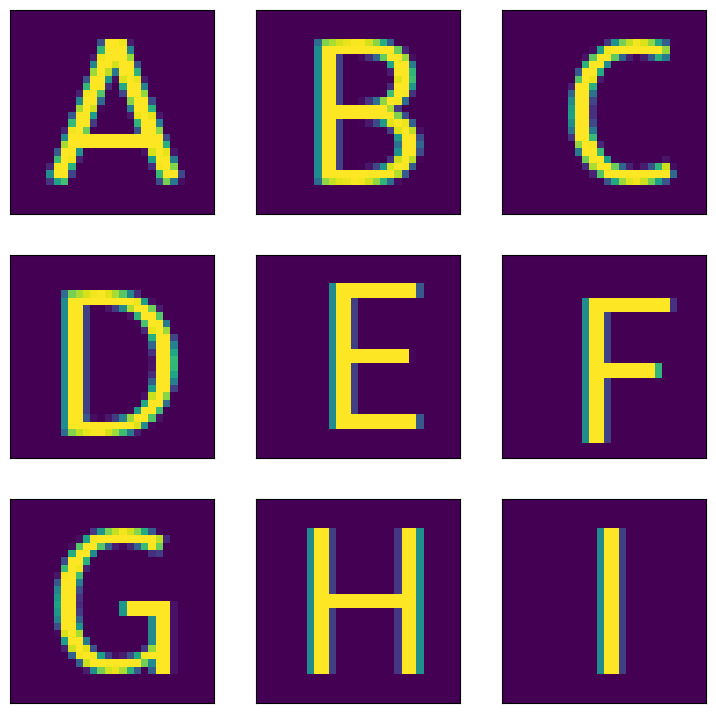

In [ ]:
import matplotlib.pyplot as plt

X_images = X.reshape(-1,28,28)
fig,axs = plt.subplots(3,3,figsize=(9,9))
for i in range(9):
    r=i//3
    c=i%3
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i])
plt.show()
del X_images

The code starts by reshaping the X array into a 3D array with dimensions (-1, 28, 28), where -1 represents the number of images, and 28x28 represents the height and width of each image.

Next, a 3x3 subplot grid is created using plt.subplots() function from Matplotlib with a figsize of (9,9), which specifies the size of the overall figure that will contain the subplots.

Then, a loop iterates over the first 9 images in X_images, and for each image, a subplot is configured to have no x-axis and y-axis ticks using set_xticks([]) and set_yticks([]) methods. The image is displayed using imshow() method, which shows the image using a color map. Finally, the plt.show() function is called to display the entire figure with the subplots.

After the visualization is displayed, the X_images array is deleted using the del statement, which may be done to free up memory or remove unnecessary data from the memory after the images have been visualized.

In [ ]:
#performing a train-test split on X and y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

The test_size parameter is set to 0.1, which indicates that 10% of the data will be used for testing, and the remaining 90% will be used for training. The resulting X_train, X_test, y_train, and y_test arrays represent the training and testing sets for the features and labels, respectively.

After the split, the y_train and y_test arrays are reshaped using the reshape() method with -1 as the argument, which is used to infer the correct shape for the array based on the size of the array and the remaining dimensions. This may be done to ensure that the labels have the correct shape for further processing or modeling, as some machine learning algorithms may require labels to be in a specific shape or format.

In [ ]:
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((54827,), (6092,))

**LABELBINARIZER**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train labels dimension:
(54827,)
Test labels dimension:
(6092,)



The **LabelBinarizer** class is a frequently utilized tool in machine learning for converting categorical labels into binary representations, often employed for tasks like one-hot encoding. In the provided code snippet, an instance of LabelBinarizer, denoted as lb, is instantiated. This instance is then utilized to both fit and transform the y_train array, converting its categorical labels into binary representations. The resulting binary labels are stored in the y_train_label variable. Similarly, the same lb instance is employed to transform the y_test array into binary labels, subsequently stored in the y_test_label variable. This process enables the conversion of categorical labels into a format suitable for various machine learning algorithms, facilitating the training and evaluation of models on categorical data.

In [ ]:
# Normalizing the Dataset for the Neural Network
X_train, X_test = np.true_divide(X_train, 255), np.true_divide(X_test, 255)

The **np.true_divide()** function from the NumPy library plays a crucial role in the preprocessing of pixel data within the X_train and X_test arrays. Specifically, this function is employed to divide each pixel value by 255, which represents the maximum intensity value in an 8-bit grayscale image. By doing so, the operation effectively scales the pixel values from their original range of [0, 255] to a normalized range of [0, 1]. Normalizing pixel values in this manner is a common practice in image processing and machine learning tasks, as it ensures that all pixel intensities lie within the same range, thereby facilitating model convergence and enhancing the stability of training algorithms. This normalization step is particularly beneficial when working with neural networks and other machine learning models that are sensitive to the scale of input data.


Normalizing the pixel values is a common preprocessing step in machine learning, especially for deep learning models like neural networks, as it helps to bring the pixel values to a similar scale and prevents any single feature from dominating the others. Normalization can also help with improving the convergence and performance of the neural network during training.

In [ ]:
# Reshape X_train and X_test for CNN
X_train = X_train.reshape(-1,28,28,1).astype('float32')
X_test = X_test.reshape(-1,28,28,1).astype('float32')

**CONCOLUTIONAL NEURAL NETWORK (CNN)**


In a convolutional neural network (CNN), which can consist of numerous layers, ranging from tens to even hundreds, each layer is trained to recognize distinct aspects of an image. The output of each layer, often referred to as a convolved feature map, serves as the input to the subsequent layer after filters are applied to each training image at different resolutions. These filters initially detect relatively simple features such as brightness and edges, gradually progressing to more complex patterns until they eventually identify specific objects within the image. Through this hierarchical arrangement of layers and filters, CNNs effectively extract and learn increasingly intricate features from input images, enabling them to achieve high levels of accuracy in tasks such as image classification and object recognition.

# Architecture of a Convolutional Neural Network (CNN)
![CNN Architecture](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*qsbsCVyu376kqdnNcdxmmw.png)

Using the above diagram, we know that there are:

1. Convolution layer where convolution happens.
2. Pooling layer where the pooling process happens
3. Normalization usually with the use of ReLu
4. Fully Connected Layers


The **Convolutional Layer (CONV)** stands as the fundamental building block within a CNN, tasked with executing convolutional operations crucial for feature extraction. At the heart of this layer lies the Kernel or Filter, responsible for performing convolution operations on the input image. As the kernel traverses the image, it applies horizontal and vertical changes dictated by the specified stride rate until the entire image is scanned. Although the kernel is typically smaller in size compared to the input image, it possesses depth. In cases where the input image comprises three channels (RGB), the kernel's height and width remain relatively modest, while its depth spans across all three channels, enabling it to capture features across the entire image spectrum.

![](https://www.interviewbit.com/blog/wp-content/uploads/2022/06/Convolutional-Layer-1536x558.png)


The **Pooling Layer (POOL)**serves a crucial role in CNNs by reducing dimensionality, thereby alleviating the computational burden associated with processing large volumes of data. This layer encompasses two main types of pooling: Maximum and Average pooling. In Maximum pooling, the layer returns the highest value from the region of the image covered by the kernel, effectively highlighting the most salient features within that region. Conversely, Average pooling computes the average of all values within the kernel-covered area, providing a smoothed representation of the underlying features. By selectively retaining essential information while discarding redundant details, the Pooling Layer facilitates efficient data processing and enhances the CNN's ability to extract meaningful features from input images.

![](https://www.interviewbit.com/blog/wp-content/uploads/2022/06/Pooling-Layer-1536x719.png)

**Dropout Layers:** A Dropout layer is a mask that eliminates some neurons' contributions to the subsequent layer while leaving all others unaltered. A Dropout layer can be applied to the input vector to cancel out part of its attributes; however, it can also be applied to a hidden layer to cancel out some hidden neurons. Dropout layers are essential in CNN training because they avoid overfitting of the training data. The first batch of training data has a disproportionately strong impact on learning if they are not present. As a result, learning of features found only in later samples or batches would be avoided.

**Fully Connected Layer (FC**): The fully connected layer (FC) works with a flattened input, which means that each input is coupled to every neuron. After that, the flattened vector is sent via a few additional FC layers, where the mathematical functional operations are normally performed. The classification procedure gets started at this point. FC layers are frequently found near the end of CNN architectures if they are present.

**Activation Function:** The activation function of the final fully connected layer is typically different from the others. The proper activation function must be chosen for each activity. The softmax function is an activation function used in the multiclass classification problem. It normalizes output real values from the last fully connected layer to target class probabilities, where each value ranges from 0 to 1 and all values add up to 1.

Following is a table of the main activation functions with their graphs and formulas.

![](https://miro.medium.com/v2/resize:fit:1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Here's a summary of above table:

1. The table presents various activation functions used in neural networks, including their mathematical equations, plots, and derivatives.
2. Linear functions like Identity and Binary Step have simple equations and derivatives, while non-linear functions like Logistic, TanH, and ELU have more complex, curved shapes and derivatives.
3. Rectified Linear Units (ReLU and its variants) are piecewise linear functions that output the input directly for non-negative values and either 0 or a small value for negative inputs.
4. The derivatives of the activation functions are crucial for backpropagation and training neural networks using gradient-based optimization methods.
5. The choice of activation function depends on the specific problem and model architecture, as different functions have different properties and trade-offs in terms of non-linearity, sparsity, and smoothness.

*  These layers carry out operations on the data in order to discover characteristics unique to the data. Convolution, activation or ReLU, and pooling are three of the most used layers.
*  Convolution runs a series of convolutional filters through the input images, activating different aspects of the images with each filter.
*  Rectified linear unit (ReLU), which maintains positive values while translating negative values to zero, enables quicker and more efficient training.
*  Due to the fact that only the activated features are carried over to the following layer, this is frequently referred to as activation.
By conducting nonlinear downsampling on the output, pooling reduces the number of parameters the network needs to learn.
*  Over tens or hundreds of layers, these procedures are repeated, and each layer learns to

In [ ]:
#Defining and compiling a convolutional neural network
cnnmodel = Sequential()
cnnmodel.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Conv2D(64,(3,3),activation = 'relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Dropout(0.2))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(128,activation='relu'))
cnnmodel.add(Dense(y_train_label.shape[1], activation='softmax'))
cnnmodel.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Defines and compiles a CNN model for image classification, with the architecture consisting of convolutional, pooling, dropout, and fully connected layers, and using the Adam optimizer with categorical cross-entropy loss for training.

In [ ]:
cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

The purpose of this code snippet is to invoke the summary() method on a pre-defined CNN model (cnnmodel), which in turn presents a concise overview of the model's architecture. This summary encapsulates crucial details such as the number of parameters within each layer, the input and output shapes of every layer, and the overall count of parameters across the entire model. By offering insights into the model's structure and size, this summary aids in comprehending the complexity and capacity of the CNN model. Additionally, it assists in identifying potential issues like overfitting or underfitting, thereby facilitating effective model evaluation and optimization.

**FITTING THE PRE-DEFINED CNN MODEL**

In [ ]:
result = cnnmodel.fit(X_train, y_train_label, validation_split=0.1, epochs=50, batch_size=100, verbose=1)

Epoch 1/50
1401/1401 [==============================] - 136s 95ms/step - loss: 0.6738 - accuracy: 0.8152 - val_loss: 0.3873 - val_accuracy: 0.8797
Epoch 2/50
1401/1401 [==============================] - 132s 94ms/step - loss: 0.3113 - accuracy: 0.9015 - val_loss: 0.2625 - val_accuracy: 0.9179
Epoch 3/50
1401/1401 [==============================] - 129s 92ms/step - loss: 0.2403 - accuracy: 0.9242 - val_loss: 0.2273 - val_accuracy: 0.9294
Epoch 4/50
1401/1401 [==============================] - 131s 93ms/step - loss: 0.2057 - accuracy: 0.9340 - val_loss: 0.2029 - val_accuracy: 0.9376
Epoch 5/50
1401/1401 [==============================] - 130s 93ms/step - loss: 0.1808 - accuracy: 0.9406 - val_loss: 0.1884 - val_accuracy: 0.9423
Epoch 6/50
1401/1401 [==============================] - 131s 93ms/step - loss: 0.1633 - accuracy: 0.9457 - val_loss: 0.1784 - val_accuracy: 0.9438
Epoch 7/50
1401/1401 [==============================] - 129s 92ms/step - loss: 0.1494 - accuracy: 0.9490 - val_loss: 0

The model undergoes training with a validation split parameter set to 0.1, signifying that 10% of the training data is allocated for validation purposes during the training phase. The training process spans across 50 epochs, each comprising iterations over batches of 100 data samples. The training progress is visually monitored as the verbose mode is enabled, set to 1, which entails that progress updates along with loss and accuracy metrics will be displayed during training. The result variable is anticipated to retain the training metrics and statistical data, facilitating in-depth analysis and evaluation of the model's performance post-training. This comprehensive approach to training configuration and monitoring allows for thorough assessment and refinement of the CNN model's efficacy and generalization capabilities.

**EVALUATING THE PRE-TRAINED CNN MODEL**

In [ ]:
test_results = cnnmodel.evaluate(X_test, y_test_label, verbose=1)
print(f'Test results - Accuracy: {test_results[1]}%')

191/191 [==============================] - 2s 9ms/step - loss: 0.2893 - accuracy: 0.9473
Test results - Accuracy: 0.9473079442977905%


The test results, including the accuracy of the model, are stored in the test_results variable. The accuracy of the model on the test data is then printed using print(). This code is likely used to assess the performance of the trained model on unseen data and obtain the accuracy as an evaluation metric.

<Axes: >

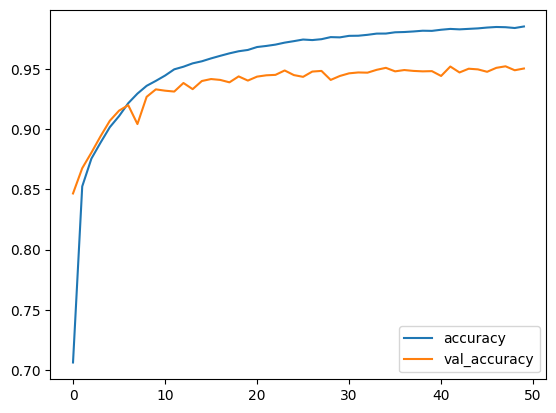

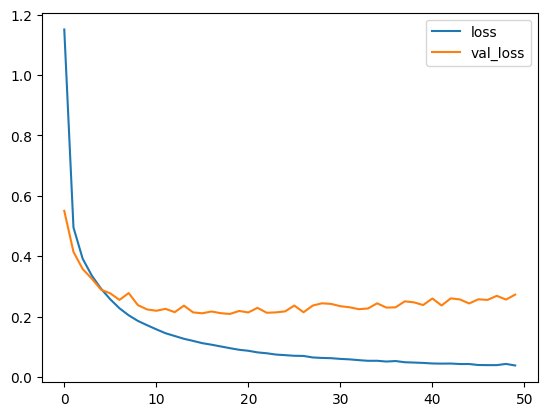

In [ ]:
#visualizing the training progress
#performance of the CNN model during training.
his = pd.DataFrame(result.history)
his.loc[:, ['accuracy', 'val_accuracy']].plot()
his.loc[:, ['loss', 'val_loss']].plot()

The training metrics, comprising accuracy and loss values, are stored within a Pandas DataFrame accessed via result.history. These metrics are then visualized using Matplotlib, where one plot displays both training and validation accuracy, while another plot showcases training and validation loss. By plotting these metrics against epochs, the code enables a visual examination of the model's performance evolution, aiding in understanding the training progress, convergence behavior, and detecting any indications of overfitting or underfitting.


**CONCLUSION**

Achieving a 95% accuracy after training a convolutional neural network (CNN) model on the dataset is indicative of its effectiveness in learning and recognizing patterns within the data. The CNN architecture, known for its ability to capture spatial hierarchies in images, likely played a crucial role in this performance boost. By employing convolutional layers to extract features and pooling layers to reduce dimensionality, the model can effectively learn relevant representations from the input images. Additionally, techniques such as dropout regularization may have helped prevent overfitting, contributing to the model's generalization performance. Overall, the significant improvement in accuracy underscores the CNN's capability to discern intricate patterns and highlights its suitability for image classification tasks.

**CITATIONS**




*   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
* https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939
* https://en.wikipedia.org/wiki/Convolutional_neural_network
* https://www.geeksforgeeks.org/cnn-image-data-pre-processing-with-generators/
* https://en.wikipedia.org/wiki/Neural_network







**LICENSING**

2024 Copyright Sarthak Shailesh Somvanshi

The right to deal in the software without restriction, including without limitation the right to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the software, is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), subject to the following requirements:

All copies or substantial parts of the Software must carry the aforementioned copyright notice and this permission notice.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.